#This is the main ipynb notebook
based on the py files in /../src_class

# Imports
from `__init__.py`

In [64]:
from google.colab import files, drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
import sys

parent_dir = "/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class"
sys.path.append(parent_dir)

import utils
import Cell_Class
import TDL_Class
import UniqueHistory_Class
import read_and_print
import initialize
import ITI


## Reloads

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)
importlib.reload(ITI)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *
# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>

# POR 0 - Initialize the TDL slices

In [3]:
TDL1_Z3_1 = TDL_Class.TDL()
TDL1_Z3_1.initialize_TDL(0,1600,1)

[   0    1    2    3    4    5    6    7   24   25   26   27   28   29
   30   31   48   49   50   51   52   53   54   55   72   73   74   75
   76   77   78   79   96   97   98   99  100  101  102  103  120  121
  122  123  124  125  126  127  144  145  146  147  148  149  150  151
  168  169  170  171  172  173  174  175  192  193  194  195  196  197
  198  199  216  217  218  219  220  221  222  223  240  241  242  243
  244  245  246  247  264  265  266  267  268  269  270  271  288  289
  290  291  292  293  294  295  312  313  314  315  316  317  318  319
  336  337  338  339  340  341  342  343  360  361  362  363  364  365
  366  367  384  385  386  387  388  389  390  391  408  409  410  411
  412  413  414  415  432  433  434  435  436  437  438  439  456  457
  458  459  460  461  462  463  480  481  482  483  484  485  486  487
  504  505  506  507  508  509  510  511  528  529  530  531  532  533
  534  535  552  553  554  555  556  557  558  559  576  577  578  579
  580 

#POR 1

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250417/Unsync1_Ch1_POR1.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250417/Unsync1_Ch1_POR1.csv'.

There are 197 tapped bins and 192 untapped = 389 = 389

Tapped is: 50.64% 



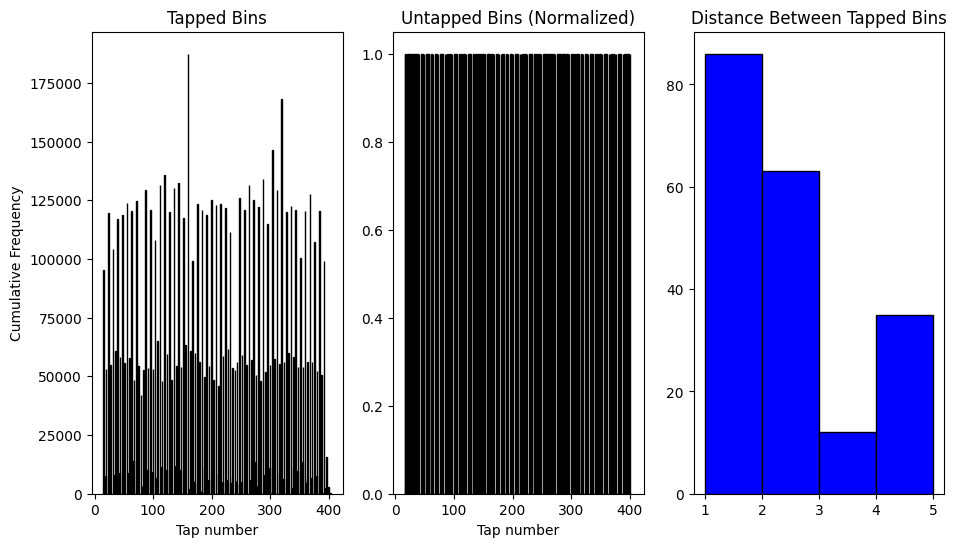

In [4]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250417/Unsync1_Ch1_POR1.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps1, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps1)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps1)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps1) / len(full_range):.2f}% \n")

# Print Taps
bin1, freq1 = read_and_print.print_taps(data, present_taps1, missing_taps)

## 2) Carry out the POR & error lib construction

In [5]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps1} \n")


# Feed to the TDL
TDL1_Z3_1.feed_physical_nums(present_taps1, 1, verbose = True)


# POR
TDL1_Z3_1.perform_POR()
to_print1 = TDL1_Z3_1.get_logical_assignments()
error_lib1 = TDL1_Z3_1.build_initial_error_lib()


Present taps: 
 [ 15  18  19  23  26  27  31  34  35  39  41  42  43  45  47  49  50  51
  55  58  59  63  65  66  67  69  71  73  74  75  79  81  82  83  85  87
  89  90  91  95  97  98  99 103 105 106 107 111 113 114 115 119 121 122
 123 127 129 130 131 135 137 138 139 143 146 147 149 151 153 154 155 159
 161 162 163 167 169 170 171 175 177 178 179 181 183 185 186 187 191 193
 194 195 199 201 202 203 207 210 211 213 215 218 219 223 225 226 227 229
 231 233 234 235 239 241 242 243 247 249 250 251 255 258 259 263 266 267
 271 273 274 275 277 279 282 283 287 289 290 291 295 297 298 299 301 303
 306 307 311 314 315 319 321 322 323 327 329 330 331 335 337 338 339 343
 345 346 347 351 353 354 355 359 361 362 363 365 367 369 370 371 373 375
 377 378 379 381 383 385 386 387 389 391 393 394 395 399 401 402 403] 

Trial 0 data processed and added to unique history. 


--------------------------------------------------------------------------------------------------------
🟡 Running 'get_logical

##3) Results

In [6]:
# Show Results

print("POR result: \n")
for i,j in TDL1_Z3_1.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL1_Z3_1.logical_assignment}")
print(f"{to_print1}")

POR result: 

((np.int64(8),),):[8]
((np.int64(3), np.int64(4), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 7, 5]
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 5, 7]
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 7, 5]
((np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 5, 7]
((np.int64(2), np.int64(3), np.int64(4)),):[2, 1, np.int64(3), 8, 4, 6, 7, 5]

Logical bin assignment: 

{0: np.int64(0), 1: np.int64(1), 2: np.int64(2), 3: np.int64(3), 4: np.int64(4), 5: np.int64(5), 6: np.int64(6), 7: np.int64(7), 8: np.int64(24), 9: np.int64(25), 10: np.int64(26), 11: np.int64(27), 12: np.int64(28), 13: np.int64(29), 14: np.int64(30), 15: np.int64(31), 16: np.int64(48), 17: np.int64(49), 18: np.int64(50), 19: np.int64(51), 20: np.int64(52), 21: np.int64(53), 22: np.int64(54), 23: np.int64(55), 24: np.int64(72), 25: np.int64(73), 26: np.int64(74), 27: np.int64(75), 28: np.i

#POR 2

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250418/Unsync2_Ch1_POR2.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250418/Unsync2_Ch1_POR2.csv'.

There are 359 tapped bins and 29 untapped = 388 = 388

Tapped is: 92.53% 



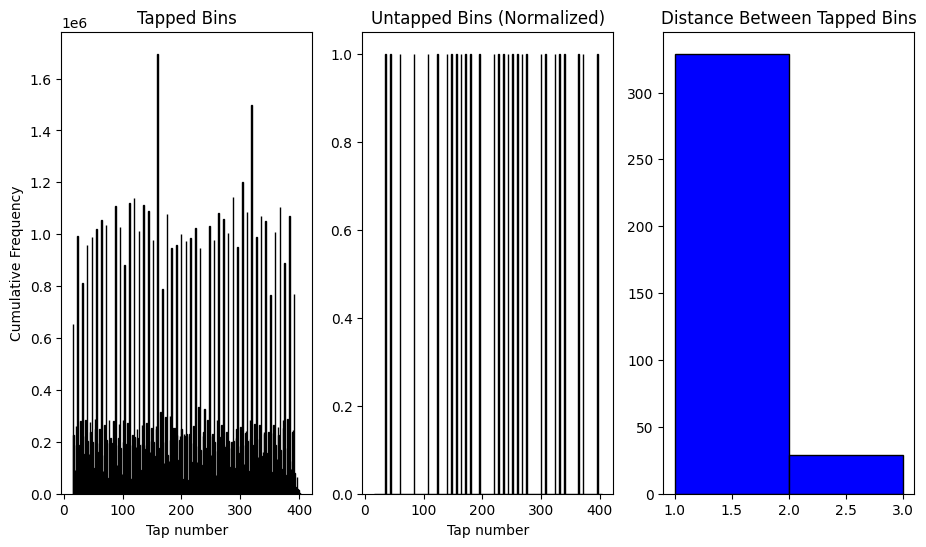

In [7]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250418/Unsync2_Ch1_POR2.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps2, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps2)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps2)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps2) / len(full_range):.2f}% \n")

# Print Taps
bin2, freq2 = read_and_print.print_taps(data, present_taps2, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [8]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps2} \n")


# Feed to the TDL
TDL1_Z3_1.feed_physical_nums(present_taps2, 2)


# POR
error_lib2 = TDL1_Z3_1.next_POR_n_error_lib(error_lib1, 2)
to_print2 = TDL1_Z3_1.get_logical_assignments()

Present taps: 
 [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  36  37  38  39  40  41  42  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 140 141 142 143 144 145 146 148
 149 150 151 152 153 154 156 157 158 159 160 161 162 164 165 166 167 168
 169 170 172 173 174 175 176 177 178 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 220 221 222 223 224 225 226
 228 229 230 231 232 233 234 236 237 238 239 240 241 242 244 245 246 247
 248 249 250 252 253 254 255 256 257 258 260 261 262 263 264 265 266 268
 269 270 271 272 273 274 276 277 27

##3) Results

In [9]:
# Show Results

print("POR result: \n")
for i,j in TDL1_Z3_1.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL1_Z3_1.logical_assignment}")
print(f"{to_print2}")

POR result: 

((np.int64(8),), (np.int64(8),)):(8,)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, 8, np.int64(4), 6, 7, 5)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 

# POR3

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250418/Unsync1_Ch1_POR3.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250418/Unsync1_Ch1_POR3.csv'.

There are 388 tapped bins and 1 untapped = 389 = 389

Tapped is: 99.74% 



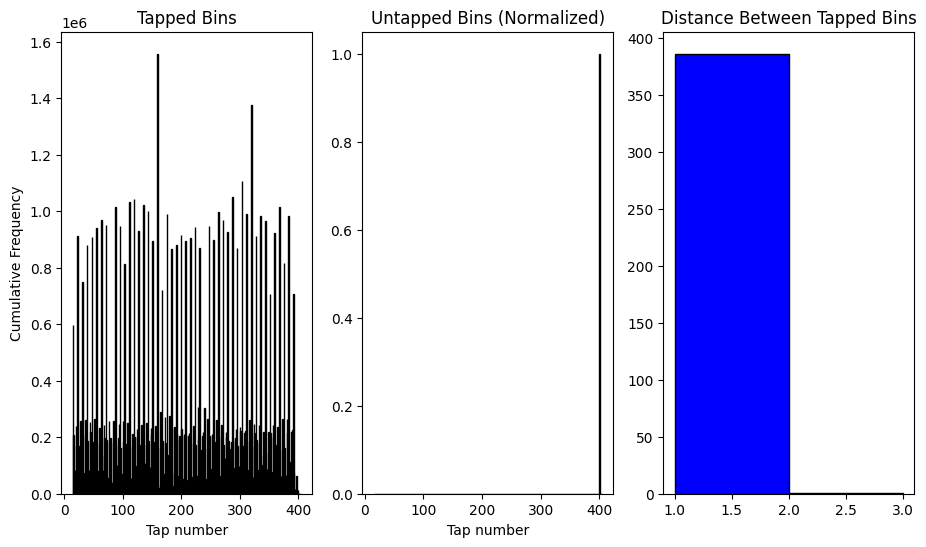

In [10]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250418/Unsync1_Ch1_POR3.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps3, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps3)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps3)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps3) / len(full_range):.2f}% \n")

# Print Taps
bin3, freq3 = read_and_print.print_taps(data, present_taps3, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [11]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps3} \n")


# Feed to the TDL
TDL1_Z3_1.feed_physical_nums(present_taps3, 3)


# POR
error_lib3 = TDL1_Z3_1.next_POR_n_error_lib(error_lib2, 3)
to_print3 = TDL1_Z3_1.get_logical_assignments()

Present taps: 
 [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 25

##3) Results

In [12]:
# Show Results

print("POR result: \n")
for i,j in TDL1_Z3_1.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL1_Z3_1.logical_assignment}")
print(f"{to_print3}")

POR result: 

((np.int64(8),), (np.int64(8),), (np.int64(8),)):(8,)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, 8, np.int64(4), 6, 7, 5)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(

# Code Density Test

In [76]:
cdc_width, cdc_to_pass = ITI.get_bin_widths(bin3, freq3, to_print2)

# Save this into a .npz file
np.savez("/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/data/TDL1_Z3_1.npz", cdc_to_pass = cdc_to_pass)

In [77]:
print(cdc_to_pass)

{np.int64(49): np.float64(29.51478566924702), np.int64(50): np.float64(10.261690651397503), np.int64(48): np.float64(0.6771495713859925), np.int64(55): np.float64(4.197921626789751), np.int64(51): np.float64(0.0009895507400058345), np.int64(53): np.float64(11.842448481019822), np.int64(54): np.float64(8.43131864760871), np.int64(52): np.float64(2.8679654322219097), np.int64(73): np.float64(45.09699378443389), np.int64(74): np.float64(8.440471991953766), np.int64(72): np.float64(0.6934771585960887), np.int64(79): np.float64(5.9526919540420975), np.int64(75): np.float64(0.47582547333180547), np.int64(77): np.float64(12.778761391213344), np.int64(78): np.float64(9.52165513048414), np.int64(76): np.float64(2.3654220889099467), np.int64(97): np.float64(37.04645426157943), np.int64(98): np.float64(10.148733434425838), np.int64(96): np.float64(0.30750289245681306), np.int64(99): np.float64(3.646642909532501), np.int64(103): np.float64(3.3336974880056554), np.int64(101): np.float64(12.89483569

In [62]:
print(bin3)
print(present_taps3)
print(freq3)

[ 15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209. 210.
 211. 

# Endpoint - to print out

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print, 1)

Type the ID for this txt file (e.g. '25_02_14'): 25_04_18_POR2
The text file has been created in this directory under the name: Bin_sequence_25_04_18_POR2.txt.


In [ ]:
files.download("Bin_sequence_25_04_18_POR2.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final_outcome_of_notebook = to_print3

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print3, 1)

# Debug Prison

In [ ]:
for i,j in TDL1_Z3_1.POR_result.items():
  print(f"{i}:{j}")

((np.int64(8),),):[8]
((np.int64(3), np.int64(4), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 7, 5]
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 5, 7]
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 7, 5]
((np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 5, 7]
((np.int64(2), np.int64(3), np.int64(4)),):[2, 1, np.int64(3), 8, 4, 6, 7, 5]


In [ ]:
r1,s,e = utils.split_into_cells(present_taps1, logical_assignment = TDL1_Z3_1.logical_assignment)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r1.items():
  print(f"{i}:{j}")

Starting Cell num: 4, Ending Cell num: 151
4:[np.int64(8)]
7:[np.int64(3), np.int64(4), np.int64(8)]
10:[np.int64(3), np.int64(4), np.int64(8)]
13:[np.int64(3), np.int64(4), np.int64(8)]
16:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
19:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
22:[np.int64(3), np.int64(4), np.int64(8)]
25:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
28:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
31:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
34:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
37:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
40:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
43:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
46:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
49:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
52:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
55:[np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
58:

In [ ]:
r2,s,e = utils.split_into_cells(present_taps2, logical_assignment = TDL1_Z3_1.logical_assignment)
print(f"Starting Cell num: {s}. Ending Cell num {e}")

for i,j in r2.items():
  print(f"{i}:{j}")

Starting Cell num: 4. Ending Cell num 151
4:[np.int64(8)]
7:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
10:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
13:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
16:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
19:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
22:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
25:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
28:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
31:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
34:[np.int64(1), np.int

In [ ]:
r3,s,e = utils.split_into_cells(present_taps3, logical_assignment = TDL1_Z3_1.logical_assignment)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r3.items():
  print(f"{i}:{j}")

Starting Cell num: 4, Ending Cell num: 151
4:[np.int64(8)]
7:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
10:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
13:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
16:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
19:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
22:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
25:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
28:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
31:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(

In [ ]:
for i,j in error_lib2.items():
  print(f"{i}:{j}")


((np.int64(8),), (np.int64(8),)):defaultdict(<class 'list'>, {(8,): (8,)})
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):defaultdict(<class 'list'>, {(1, 2, 3, 4, 5, 6, 7, 8): (2, 3, 1, 8, np.int64(4), 6, 7, 5)})
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):defaultdict(<class 'list'>, {(1, 2, 3, 4, 5, 6, 7, 8): (2, 3, 1, np.int64(4), 8, 6, 7, 5)})
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):defaultdict(<class 'list'>, {(1, 2, 3, 4, 5, 6, 7, 8): (2, 1, np.int64(3), 4, 8, 6, 5, 7)})
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):defaultdict(<class 'list'>, {(1, 2, 3, 4, 5,

In [ ]:
bin2[np.where(freq2 > 0)]
freq2[np.where(bin2 == 291)]

array([5.])

In [ ]:
code_density_test = freq3 / np.sum(freq3) * 4000  # in units of ps
for i in code_density_test:
  print(i)

29.514785669247022
10.261690651397503
0.6771495713859925
4.197921626789751
0.0009895507400058345
11.842448481019822
8.43131864760871
2.8679654322219092
45.09699378443389
8.440471991953766
0.6934771585960887
5.9526919540420975
0.47582547333180547
12.778761391213344
9.52165513048414
2.3654220889099467
37.04645426157943
10.148733434425838
0.307502892456813
3.646642909532501
3.3336974880056554
12.894835693016029
9.549214118593301
1.5792735035123115
43.559627754760825
9.220237975078362
0.35519923812509424
4.0789281503040495
2.9094770857651544
12.572143196700125
10.850720729385976
0.0018306688690107936
44.88424037533264
9.036626835270281
0.24585388135444958
4.382522317337839
0.17297346935301985
13.098336802698228
11.317442335909728
0.5127851934710234
46.4885000350301
8.857122331033223
0.6737356213329724
4.01119340215065
3.2448853090901317
11.447568258220496
9.623875721926742
1.7562051758253545
47.96367280069379
6.689461957513441
1.5550789879191687
4.076206885769033
2.1905189956139153
12.0994

In [ ]:
len(np.where(code_density_test < 0.5)[0]) # Get rid of these ones; these post processing can be done later during ITI.

38

# Reload (same thing)

In [71]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)
importlib.reload(ITI)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *
# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'ITI' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/ITI.py'>